In [ ]:
## Objective

# This notebook analyzes multi-cloud (GCP, AWS, Azure) billing data to identify cost-saving opportunities and usage trends across services, accounts, and time.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.path.expanduser("~/.secrets/cloudops-analyzer.json")

In [2]:
from google.cloud import bigquery

client = bigquery.Client()

query = """
SELECT *
FROM `cloudops-analyzer.finops_sim.gcp_billing`
WHERE start_time >= '2025-01-01'
ORDER BY start_time ASC
LIMIT 1000

"""

df = client.query(query).to_dataframe()
df.head()

,project,service,sku,usage_type,region,cost,usage_amount,start_time
0,prod-video,BigQuery,Premium,CUD,europe-west1,638.34,408.09,2025-06-01
1,prod-video,Compute Engine,Premium,OnDemand,us-east1,764.17,1686.95,2025-06-01
2,prod-video,Cloud Storage,Premium,OnDemand,us-east1,278.09,447.40,2025-06-01
3,eng-streaming,Compute Engine,Premium,OnDemand,us-central1,447.96,955.04,2025-06-01
4,dev-ml,Cloud Storage,Standard,CUD,us-central1,203.39,1872.52,2025-06-01


In [3]:
# 1. View schema and null counts
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   project       450 non-null    object 
 1   service       450 non-null    object 
 2   sku           450 non-null    object 
 3   usage_type    450 non-null    object 
 4   region        450 non-null    object 
 5   cost          450 non-null    float64
 6   usage_amount  450 non-null    float64
 7   start_time    450 non-null    dbdate 
dtypes: dbdate(1), float64(2), object(5)
memory usage: 28.2+ KB


project         0
service         0
sku             0
usage_type      0
region          0
cost            0
usage_amount    0
start_time      0
dtype: int64

In [4]:
# 2. Basic descriptive stats
display(df.describe(include='all'))

,project,service,sku,usage_type,region,cost,usage_amount,start_time
count,450,450,450,450,450,450.000000,450.000000,450
unique,4,4,2,2,3,NaN,NaN,30
top,shared-data,Cloud Storage,Standard,OnDemand,us-east1,NaN,NaN,2025-06-01
freq,120,137,228,227,167,NaN,NaN,15
mean,NaN,NaN,NaN,NaN,NaN,412.358822,995.799200,NaN
std,NaN,NaN,NaN,NaN,NaN,223.113216,582.242303,NaN
min,NaN,NaN,NaN,NaN,NaN,20.750000,51.090000,NaN
25%,NaN,NaN,NaN,NaN,NaN,229.362500,477.490000,NaN
50%,NaN,NaN,NaN,NaN,NaN,425.745000,984.570000,NaN
75%,NaN,NaN,NaN,NaN,NaN,599.977500,1509.822500,NaN


In [5]:
# 3. Unique values per column
df.nunique()

project           4
service           4
sku               2
usage_type        2
region            3
cost            448
usage_amount    450
start_time       30
dtype: int64

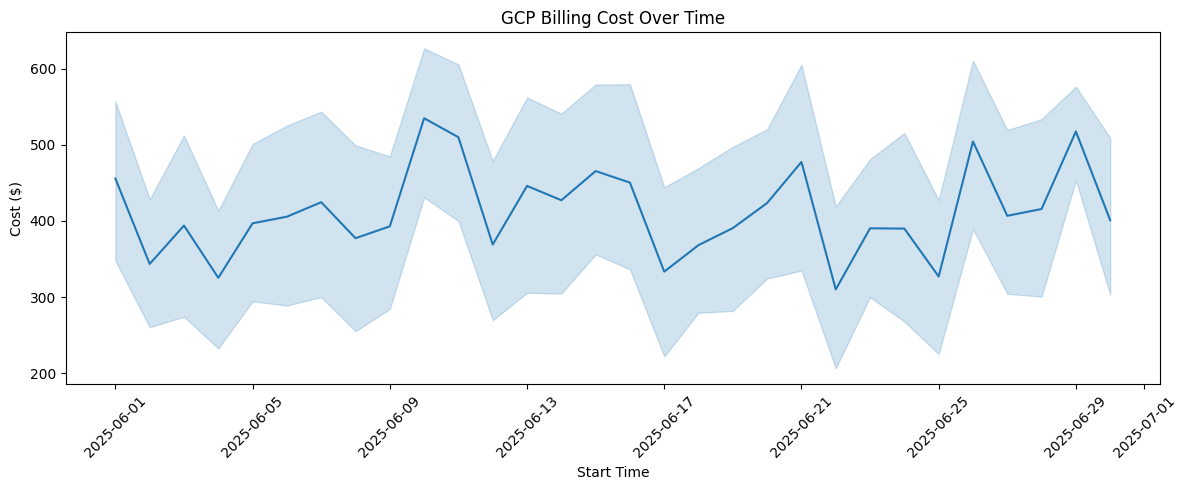

In [6]:
# Cost over time
plt.figure(figsize=(12, 5))
sns.lineplot(data=df.sort_values("start_time"), x="start_time", y="cost")
plt.title("GCP Billing Cost Over Time")
plt.xlabel("Start Time")
plt.ylabel("Cost ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

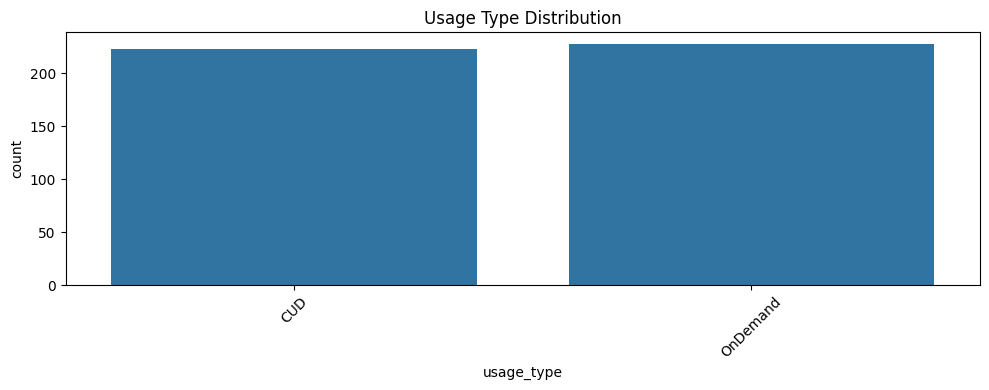

In [7]:
# Usage type distribution
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='usage_type')
plt.title("Usage Type Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

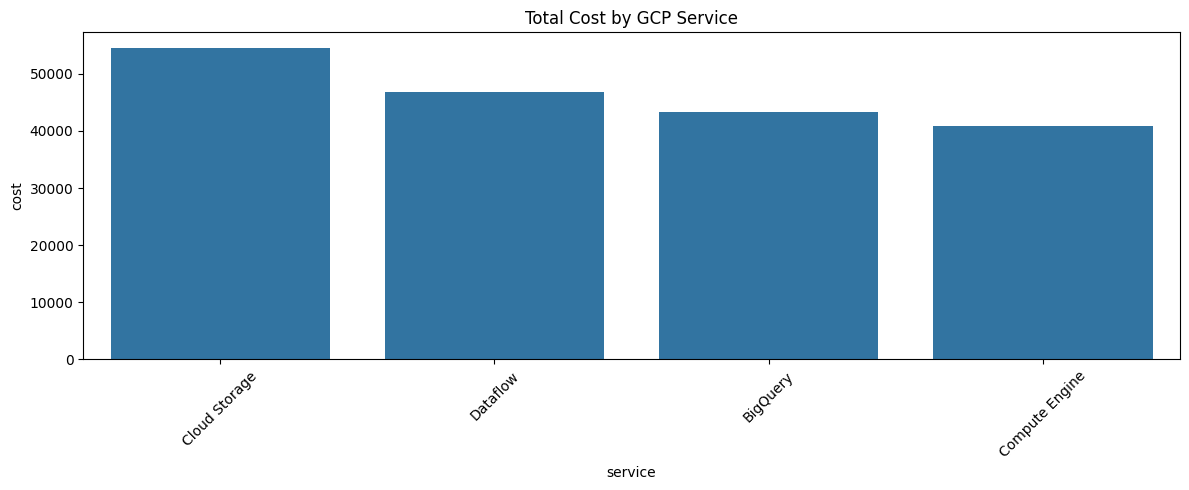

In [8]:
# Cost by service
plt.figure(figsize=(12, 5))
sns.barplot(data=df.groupby("service")["cost"].sum().reset_index().sort_values("cost", ascending=False), x="service", y="cost")
plt.title("Total Cost by GCP Service")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values